# Examining how geospatial data can help improve predicting housing prices
Group 9 - Julius Løve Fischer, Hans Chirstian Jul Lehmann & Kerem Yapici

## Importing packages and unzipping data from boliga.dk

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
#import requests
from datetime import date
#import time
#import math
#import os
#import ast
#import json
import matplotlib.pyplot as plt
#import tqdm
import seaborn as sns
#import folium
#import geopandas as gpd
#import fiona
#from shapely.geometry import Point
%matplotlib inline

In [2]:
# Saving the merged file - will use this from now on
#path = r'C:\Users\Kerem\Desktop'

#boliga.to_csv(path +'/boliga.csv')

In [2]:
boliga = pd.read_csv(r'C:\Users\Kerem\Desktop' + '/boliga.csv')

In [3]:
pd.set_option('display.max_columns', None)

# getting a overview of data
boliga.describe()

# Column type
boliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88786 entries, 0 to 88785
Data columns (total 86 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          88786 non-null  int64  
 1   address                             88786 non-null  object 
 2   zipCode                             88786 non-null  int64  
 3   price                               88786 non-null  int64  
 4   propertyType                        88786 non-null  int64  
 5   saleType                            88786 non-null  object 
 6   sqmPrice                            88786 non-null  float64
 7   rooms                               88786 non-null  float64
 8   size                                88786 non-null  int64  
 9   buildYear                           88786 non-null  int64  
 10  latitude                            88786 non-null  float64
 11  longitude                           88786

## Data cleaning

In [4]:
# converting column types automatically
boliga.convert_dtypes().dtypes

# removing duplicate columns
boliga = boliga.drop(columns=['heatingCode.1', 'notes.1', 'roomsQuantity.1']).copy()


In [5]:
pd.set_option('display.max_rows', 100)

# replacing '-' with np.NaN
boliga.replace('-', np.NaN, inplace=True)

# This way, we can count the number of missing values per column;
boliga.isnull().sum() 

# as a share of total
share = boliga.isnull().sum(axis=0) * 100 / len(boliga)

# dropping columns with NaN share of >=20%
list = ['Unnamed: 0', 'conservationCode', 'conservationWorthy', 'drainCode', 'drainPermission', 'heatingCode', 
        'additionalHeatingSupplyCode', 'additionalOuterWallMaterial', 'additionalRoofMaterial', 'asbestosMaterial', 
        'energyCode', 'heatingInstallationCode', 'heatingSecondaryCode', 'usageCode']

#other non-relevant columns
non_relevant = ['accessAreaArea', 'area', 'areaBusiness','areaClosedCovered','areaLiving','areaOpenCovered','areaOther',
'areaRecorded', 'appliance', 'areaSocial', 'areaUnit','basementSize','buildInCarportArea','buildInGarageArea','buildingArea',
'buildingNumber', 'buildingUsage','buildInOuthouseArea','businessArea','carbageRoomArea','closedCoveredArea',
'conservatoryArea', 'constructionYear', 'coveredArea','floorDeviation','floorQuantity','livingArea','notes','objectStatus','openCoveredArea',
'otherArea','propertyCondemned', 'propertyUnitType', 'roomsBusinessQuantity','secureRoomArea','toiletCode']


# extending list with non-relevant
list.extend(non_relevant)

# dropping lists
boliga = boliga.drop(columns=list)

In [8]:
#boliga.describe()

# check buildYear, ejendomsværdiskat, grundskyld, monthlyPropertyTax, lotSize, evaluationPrice, latesstRebuildYear, appartmentsWithKitchensQuantity, toiletQuantity, bathroomQuantity

boliga['bathroomQuantity'].unique()

# dropping columns with 0 values    

boliga = boliga.loc[(boliga[['buildYear', 'ejendomsværdiskat','grundskyld', 'monthlyPropertyTax', 'appartmentsWithKitchensQuantity', 'toiletQuantity', 'bathroomQuantity']] != 0).all(axis=1)].reset_index(drop=True)

boliga

,address,zipCode,price,propertyType,saleType,sqmPrice,rooms,size,buildYear,latitude,longitude,municipalityCode,city,unitId,addressFloor,ejendomsværdiskat,grundskyld,propertyTypeName,monthlyPropertyTax,lotSize,roomsQuantity,evaluationPrice,latesstRebuildYear,heatingSupplyCode,outerWalls,roof,waterSupplyCode,appartmentsWithKitchensQuantity,appartmentsWithoutKitchensQuantity,toiletQuantity,bathroomCode,bathroomQuantity,kitchenCode
0,"Gyldenlakvej 27, 1. tv",2300,2340000,3,Alm. Salg,41052.6330,2.0,57,1938,55.645130,12.612886,101,København S,f08ba307-5131-485f-8a9c-a51b53511aa3,1.0,6405.0,3685.60,Ejerlejlighed,841.0,0.0,2.0,910000.0,0,Fjernvarme/blokvarme,Mursten,Fibercement herunder asbest,0,72,0,1,Badeværelse i enheden,1,Eget køkken med afløb
1,"Gammel Kongevej 165A, 1",1850,5995000,3,Alm. Salg,66611.1100,3.0,90,2000,55.677700,12.535549,147,Frederiksberg C,5ddda144-2d9e-413d-9cbe-468522500a68,1.0,13650.0,5063.85,Ejerlejlighed,1559.0,0.0,3.0,2300000.0,0,Fjernvarme/blokvarme,Mursten,Metal,Alment vandforsyningsanlæg,11,0,1,Badeværelse i enheden,1,Eget køkken med afløb
2,"Rolfsvej 37, 2. th",2000,7887000,3,Alm. Salg,71054.0550,4.0,111,1916,55.683937,12.531795,147,Frederiksberg,cf5a390d-4b0b-4f11-a79f-109e540864e0,2.0,16800.0,4521.83,Ejerlejlighed,1777.0,0.0,4.0,2600000.0,2005,Fjernvarme/blokvarme,Mursten,Tegl,Alment vandforsyningsanlæg,14,0,1,Badeværelse i enheden,1,Eget køkken med afløb
3,"Havneholmen 82, 2. th",1561,5200000,3,Alm. Salg,68421.0550,2.0,76,2008,55.661070,12.564086,101,København V,31c9cf15-56cd-4e0c-8324-5e9f34bfd78b,2.0,11025.0,13045.80,Ejerlejlighed,2006.0,0.0,2.0,1950000.0,0,Fjernvarme/blokvarme,Andet materiale,Andet materiale,0,85,0,1,Badeværelse i enheden,1,Eget køkken med afløb
4,"Islands Brygge 24B, 4. tv",2300,7825000,3,Alm. Salg,74523.8100,3.0,105,1910,55.663128,12.571215,101,København S,95e09d1f-dcf2-4e5c-abb4-fd3e753a7c3c,4.0,20500.0,14851.20,Ejerlejlighed,2946.0,0.0,3.0,3350000.0,2001,Fjernvarme/blokvarme,Mursten,Tagpap med stor hældning,0,34,0,1,Badeværelse i enheden,1,Eget køkken med afløb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70269,"Ved Andebakken 8, 2. th",2000,841167,3,Alm. Salg,14257.0670,2.0,59,1941,55.679510,12.528546,147,Frederiksberg,fca28625-bf5d-41ec-b141-0230ebfa0a63,2.0,8400.0,2695.28,Ejerlejlighed,925.0,0.0,2.0,1350000.0,0,Fjernvarme/blokvarme,Mursten,Fibercement herunder asbest,0,60,0,1,Badeværelse i enheden,1,Eget køkken med afløb
70270,"Præstekærvej 7, 3. th",2700,834986,3,Alm. Salg,10437.3250,3.0,80,1959,55.705850,12.493291,101,Brønshøj,cd2c0e25-0d81-43ea-8809-ad411c548a4d,3.0,8715.0,9118.80,Ejerlejlighed,1486.0,0.0,3.0,1050000.0,0,Fjernvarme/blokvarme,Mursten,Fibercement herunder asbest,0,31,0,1,Badeværelse i enheden,1,Eget køkken med afløb
70271,Fordresgårdvej 42,2400,1997000,1,Alm. Salg,15601.5625,5.0,128,1928,55.692370,12.516315,101,København NV,8c8c5d56-e5f9-4957-9132-80e7744d7ac2,NaN,17325.0,46671.80,Villa,5333.0,383.0,5.0,3250000.0,0,Fjernvarme/blokvarme,Mursten,Tegl,0,1,0,2,Badeværelse i enheden,1,Eget køkken med afløb
70272,"Rosenvængets Hovedvej 34, 2. th",2100,1300000,3,Alm. Salg,14130.4350,3.0,92,1938,55.701344,12.586740,101,København Ø,5c159954-5b67-4621-b9b2-919db0c364ee,2.0,13650.0,16031.00,Ejerlejlighed,2473.0,0.0,3.0,2000000.0,0,Fjernvarme/blokvarme,Mursten,Tagpap med stor hældning,0,84,0,1,Badeværelse i enheden,1,Eget køkken med afløb


In [7]:
boliga.describe()

,zipCode,price,propertyType,sqmPrice,rooms,size,buildYear,latitude,longitude,municipalityCode,addressFloor,ejendomsværdiskat,grundskyld,monthlyPropertyTax,lotSize,roomsQuantity,evaluationPrice,latesstRebuildYear,appartmentsWithKitchensQuantity,appartmentsWithoutKitchensQuantity,toiletQuantity,bathroomQuantity
count,70274.000000,7.027400e+04,70274.000000,7.027400e+04,70274.000000,70274.000000,70274.000000,70274.000000,70274.000000,70274.000000,57330.000000,70274.000000,70274.000000,70274.000000,70274.000000,70274.000000,7.027400e+04,70274.000000,70274.000000,70274.000000,70274.000000,70274.000000
mean,2215.571050,3.651021e+06,2.707118,3.763798e+04,3.301804,97.080798,1944.227154,55.678504,12.551646,108.391525,2.223059,13335.673080,14829.112173,2347.069243,107.169593,3.301989,2.219094e+06,269.719270,47.058912,0.111677,1.231494,1.120030
std,344.394378,2.632420e+06,0.661819,2.660603e+04,1.461179,43.272389,43.901864,0.022795,0.042704,16.893181,1.904456,7834.986674,16318.909688,1765.379380,241.528799,1.461341,1.413859e+06,678.431406,63.678212,1.217684,0.492744,0.344759
min,1050.000000,1.402500e+04,1.000000,1.821429e+02,1.000000,22.000000,1623.000000,55.616314,12.453647,101.000000,-1.000000,767.550000,149.600000,250.000000,0.000000,1.000000,2.200000e+05,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2000.000000,2.050000e+06,3.000000,2.681182e+04,2.000000,64.000000,1913.000000,55.661453,12.519243,101.000000,1.000000,7770.000000,4202.400000,1030.000000,0.000000,2.000000,1.150000e+06,0.000000,7.000000,0.000000,1.000000,1.000000
50%,2300.000000,3.100000e+06,3.000000,3.613605e+04,3.000000,90.000000,1936.000000,55.679127,12.550787,101.000000,2.000000,12075.000000,7684.000000,1773.000000,0.000000,3.000000,1.950000e+06,0.000000,25.000000,0.000000,1.000000,1.000000
75%,2450.000000,4.519444e+06,3.000000,4.592982e+04,4.000000,119.000000,1975.000000,55.697636,12.585069,101.000000,3.000000,16800.000000,16578.400000,3070.000000,0.000000,4.000000,2.850000e+06,0.000000,61.000000,0.000000,1.000000,1.000000
max,2900.000000,1.230000e+08,3.000000,4.730769e+06,35.000000,971.000000,2022.000000,55.731308,12.639575,147.000000,29.000000,282550.000000,227708.200000,40199.000000,2425.000000,35.000000,2.330000e+07,2022.000000,476.000000,33.000000,22.000000,7.000000


## Outliers

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
boliga[['sqmPrice']].describe()

print(boliga[['sqmPrice']].describe().to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &   sqmPrice \\
\midrule
count &   70274.00 \\
mean  &   37637.98 \\
std   &   26606.03 \\
min   &     182.14 \\
25\%   &   26811.82 \\
50\%   &   36136.05 \\
75\%   &   45929.82 \\
max   & 4730769.00 \\
\bottomrule
\end{tabular}



<function matplotlib.pyplot.show(close=None, block=None)>

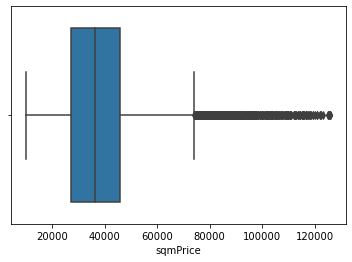

In [9]:
# checking sqmprice
boliga = boliga.loc[(boliga['sqmPrice']<=126000) & (boliga['sqmPrice']>=10000)]

#boliga[['sqmPrice']].describe()

# plotting
sns.boxplot(x=boliga['sqmPrice'])
plt.show

In [10]:
# checking sqmprice
boliga = boliga.loc[(boliga['sqmPrice']<=126000) & (boliga['sqmPrice']>=10000)]

#boliga[['sqmPrice']].describe()

# taking log
boliga['sqmPrice_log'] = np.log(boliga['sqmPrice'])

c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

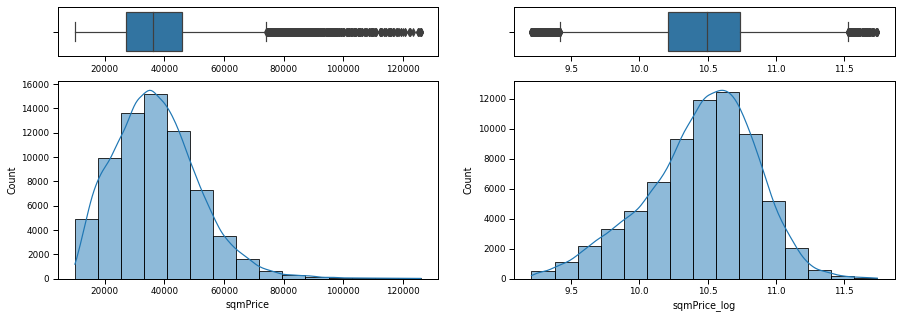

In [11]:
sns.despine()
sns.set_context("paper")
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex=False, gridspec_kw={"height_ratios": (.20, .80),}, figsize=(15,5))

# assigning a graph to each ax
sns.boxplot(boliga['sqmPrice'], ax=ax_box[0]).set(xlabel=None)
sns.boxplot(boliga['sqmPrice_log'], ax=ax_box[1]).set(xlabel=None)

sns.histplot(data=boliga['sqmPrice'], bins=15, kde=True, ax=ax_hist[0])
sns.histplot(data=boliga['sqmPrice_log'], bins=15, kde=True, ax=ax_hist[1])
plt.savefig('box_hist_sqmPrices.png', bbox_inches="tight")

## Descriptive analysis

In [12]:
#check 
boliga['toiletQuantity']

0        1
1        1
2        1
3        1
4        1
        ..
70269    1
70270    1
70271    2
70272    1
70273    1
Name: toiletQuantity, Length: 69390, dtype: int64